In [19]:
import pandas as pd
import numpy as np
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

In [3]:
df=pd.DataFrame()

In [4]:
df

""


In [5]:
df["x1"]=[1,2,3,4,5,6,6,7,9,9]
df["x2"]=[5,3,6,8,1,9,5,8,9,2]


In [7]:
df["label"]=[1,1,0,1,0,1,0,1,0,0]

In [8]:
df

,x1,x2,label
0,1,5,1
1,2,3,1
2,3,6,0
3,4,8,1
4,5,1,0
5,6,9,1
6,6,5,0
7,7,8,1
8,9,9,0
9,9,2,0


<Axes: xlabel='x1', ylabel='x2'>

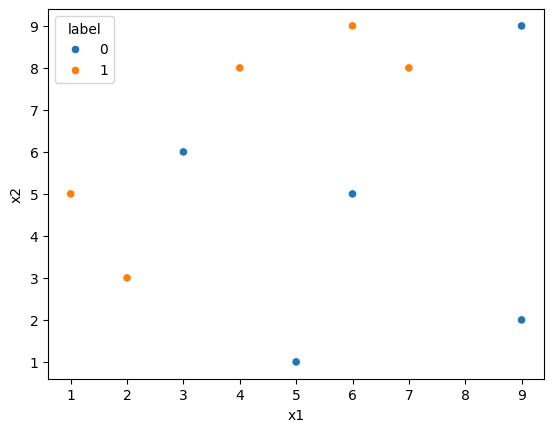

In [9]:
import seaborn as sns
sns.scatterplot(df,x="x1",y="x2",hue="label")

In [11]:
df["weights"]=1/df.shape[0]

In [12]:
df.head()

,x1,x2,label,weights
0,1,5,1,0.1
1,2,3,1,0.1
2,3,6,0,0.1
3,4,8,1,0.1
4,5,1,0,0.1


In [14]:
from sklearn.tree import DecisionTreeClassifier
dt1=DecisionTreeClassifier(max_depth=1)

In [16]:
X=df.iloc[:,0:2].values
y=df.iloc[:,2].values

In [17]:
# Train the first model
dt1.fit(X,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[1] <= 2.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.469\nsamples = 8\nvalue = [3, 5]'),
 Text(0.625, 0.5, '  False')]

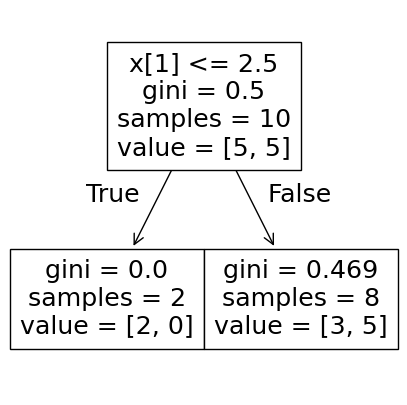

In [20]:
from sklearn.tree import plot_tree
plt.figure(figsize=(5,5))
plot_tree(dt1)


<Axes: >

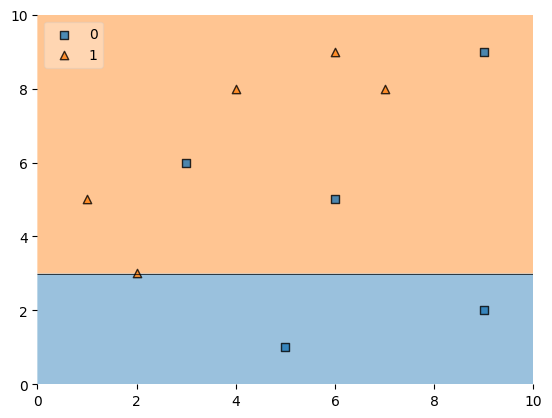

In [21]:
plot_decision_regions(X,y,clf=dt1,legend=2)

In [22]:
df["y_pred"]=dt1.predict(X)

In [23]:
df

,x1,x2,label,weights,y_pred
0,1,5,1,0.1,1
1,2,3,1,0.1,1
2,3,6,0,0.1,1
3,4,8,1,0.1,1
4,5,1,0,0.1,0
5,6,9,1,0.1,1
6,6,5,0,0.1,1
7,7,8,1,0.1,1
8,9,9,0,0.1,1
9,9,2,0,0.1,0


In [24]:
def calculate_model_weight(error):
    return 0.5*np.log((1-error)/error)

In [25]:
# Calculate model weight
alpha1=calculate_model_weight(0.3)
print(alpha1)

0.42364893019360184


In [29]:
# Update weight
def update_row_weights(row,alpha=0.423):
    if row["label"]==row["y_pred"]:
        return row["weights"] * np.exp(-alpha)
    else:
        return row["weights"] * np.exp(alpha)

In [30]:
df["updated_weights"]=df.apply(update_row_weights,axis=1)

In [31]:
df

,x1,x2,label,weights,y_pred,updated_weights
0,1,5,1,0.1,1,0.065508
1,2,3,1,0.1,1,0.065508
2,3,6,0,0.1,1,0.152653
3,4,8,1,0.1,1,0.065508
4,5,1,0,0.1,0,0.065508
5,6,9,1,0.1,1,0.065508
6,6,5,0,0.1,1,0.152653
7,7,8,1,0.1,1,0.065508
8,9,9,0,0.1,1,0.152653
9,9,2,0,0.1,0,0.065508


In [32]:
df["updated_weights"].sum()

0.9165153319682015

In [33]:
df["normalised_weights"]=df["updated_weights"]/df["updated_weights"].sum()

In [34]:
df

,x1,x2,label,weights,y_pred,updated_weights,normalised_weights
0,1,5,1,0.1,1,0.065508,0.071475
1,2,3,1,0.1,1,0.065508,0.071475
2,3,6,0,0.1,1,0.152653,0.166559
3,4,8,1,0.1,1,0.065508,0.071475
4,5,1,0,0.1,0,0.065508,0.071475
5,6,9,1,0.1,1,0.065508,0.071475
6,6,5,0,0.1,1,0.152653,0.166559
7,7,8,1,0.1,1,0.065508,0.071475
8,9,9,0,0.1,1,0.152653,0.166559
9,9,2,0,0.1,0,0.065508,0.071475
